<b>
Kelompok : 8
<br>
Nama Kelompok : Automata
<br>
Dataset : Churn Prediction
<br>
Anggota Kelompok :
<br>
-	Achmad Jaelani Azizs Irphan 
<br>
-	Aditya Yudha Isa
<br>
-	Atina Za'ima 
<br>
-	Muhammad Akbar Pratama Putra 
<br>
-	Tiara Kusumadewi 
<br>
-	Wahidin
</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('./Dataset/E Commerce Dataset.xlsx', sheet_name='E Comm')
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
data['Tenure'].unique()

array([ 4., nan,  0., 13., 11.,  9., 19., 20., 14.,  8., 18.,  5.,  2.,
       30.,  1., 23.,  3., 29.,  6., 26., 28.,  7., 24., 25., 10., 15.,
       22., 27., 16., 12., 21., 17., 50., 60., 31., 51., 61.])

## Drop Kolom/Fitur Yang Tidak Digunakan

In [4]:
dataChurn = data.drop(['CustomerID', 'WarehouseToHome', 'OrderAmountHikeFromlastYear', 'CouponUsed'], axis=1)
dataChurn.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,1.0,5.0,159.93
1,1,NaN,Phone,1,UPI,Male,3.0,4,Mobile,3,Single,7,1,1.0,0.0,120.90
2,1,NaN,Phone,1,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,1.0,3.0,120.28
3,1,0.0,Phone,3,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,1.0,3.0,134.07
4,1,0.0,Phone,1,CC,Male,NaN,3,Mobile,5,Single,3,0,1.0,3.0,129.60


In [5]:
dataChurn.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [6]:
dataChurn[['Tenure', 'DaySinceLastOrder', 'OrderCount', 'HourSpendOnApp']].describe()

,Tenure,DaySinceLastOrder,OrderCount,HourSpendOnApp
count,5366.000000,5323.000000,5372.000000,5375.000000
mean,10.189899,4.543491,3.008004,2.931535
std,8.557241,3.654433,2.939680,0.721926
min,0.000000,0.000000,1.000000,0.000000
25%,2.000000,2.000000,1.000000,2.000000
50%,9.000000,3.000000,2.000000,3.000000
75%,16.000000,7.000000,3.000000,3.000000
max,61.000000,46.000000,16.000000,5.000000


## Praproses Missing Value & Ambigous Values

In [7]:
dataChurn.isna().sum()

Churn                         0
Tenure                      264
PreferredLoginDevice          0
CityTier                      0
PreferredPaymentMode          0
Gender                        0
HourSpendOnApp              255
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
OrderCount                  258
DaySinceLastOrder           307
CashbackAmount                0
dtype: int64

<b>Tenure</b>

In [8]:
dataChurn['Tenure'].unique()

array([ 4., nan,  0., 13., 11.,  9., 19., 20., 14.,  8., 18.,  5.,  2.,
       30.,  1., 23.,  3., 29.,  6., 26., 28.,  7., 24., 25., 10., 15.,
       22., 27., 16., 12., 21., 17., 50., 60., 31., 51., 61.])

In [9]:
dataChurn['Tenure'].sample(10)

4792    16.0
1301     5.0
896      0.0
2113    13.0
4064    31.0
4221    12.0
3000     5.0
4046    15.0
3514    16.0
5067    18.0
Name: Tenure, dtype: float64

In [10]:
dataChurn.groupby(['Gender', 'Churn']).agg({'Tenure' : ['mean', 'median']}).reset_index(col_level=1)

Tenure       
   Gender Churn       mean median
0  Female     0  12.021300   11.0
1  Female     1   2.974843    1.0
2    Male     0  11.146177   10.0
3    Male     1   3.613843    1.0

In [11]:
dataChurn['Tenure'] = dataChurn.groupby(['Gender', 'Churn'])['Tenure'].apply(lambda x: x.fillna(x.median()))
dataChurn.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,1.0,5.0,159.93
1,1,1.0,Phone,1,UPI,Male,3.0,4,Mobile,3,Single,7,1,1.0,0.0,120.90
2,1,1.0,Phone,1,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,1.0,3.0,120.28
3,1,0.0,Phone,3,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,1.0,3.0,134.07
4,1,0.0,Phone,1,CC,Male,NaN,3,Mobile,5,Single,3,0,1.0,3.0,129.60


<b>HourSpendOnApp</b>

In [12]:
dataChurn['HourSpendOnApp'].unique()

array([ 3.,  2., nan,  1.,  0.,  4.,  5.])

In [13]:
data['HourSpendOnApp'].sample(10)

2379    3.0
3535    4.0
3007    3.0
2811    2.0
5177    4.0
4582    3.0
784     NaN
3085    4.0
3921    3.0
4200    4.0
Name: HourSpendOnApp, dtype: float64

In [14]:
dataChurn.groupby(['Gender', 'NumberOfDeviceRegistered']).agg({'HourSpendOnApp' : ['mean', 'median']}).reset_index(col_level=1)

HourSpendOnApp       
    Gender NumberOfDeviceRegistered           mean median
0   Female                        1       2.448718    2.0
1   Female                        2       3.288660    3.0
2   Female                        3       2.465490    2.0
3   Female                        4       3.132055    3.0
4   Female                        5       3.239554    3.0
5   Female                        6       3.426230    3.0
6     Male                        1       2.448819    2.0
7     Male                        2       3.316092    3.0
8     Male                        3       2.420259    2.0
9     Male                        4       3.115385    3.0
10    Male                        5       3.201961    3.0
11    Male                        6       3.346535    3.0

In [15]:
dataChurn['HourSpendOnApp'] = dataChurn.groupby(['Gender', 'NumberOfDeviceRegistered'])['HourSpendOnApp'].apply(lambda x: x.fillna(x.median()))
dataChurn.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,1.0,5.0,159.93
1,1,1.0,Phone,1,UPI,Male,3.0,4,Mobile,3,Single,7,1,1.0,0.0,120.90
2,1,1.0,Phone,1,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,1.0,3.0,120.28
3,1,0.0,Phone,3,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,1.0,3.0,134.07
4,1,0.0,Phone,1,CC,Male,2.0,3,Mobile,5,Single,3,0,1.0,3.0,129.60


<b>OrderCount</b>

In [16]:
dataChurn['OrderCount'].unique()

array([ 1.,  6.,  2., 15.,  4.,  7.,  3.,  9., nan, 11.,  5., 12., 10.,
        8., 13., 14., 16.])

In [17]:
dataChurn['OrderCount'].sample(10)

906     4.0
1162    1.0
2116    7.0
3033    2.0
3889    2.0
5579    2.0
1633    1.0
3467    2.0
4122    7.0
57      1.0
Name: OrderCount, dtype: float64

In [18]:
dataChurn.groupby('Gender').agg({'OrderCount' : ['mean', 'median']}).reset_index(col_level=1)

OrderCount       
   Gender       mean median
0  Female   3.122459    2.0
1    Male   2.933681    2.0

In [19]:
dataChurn['OrderCount'] = dataChurn.groupby('Gender')['OrderCount'].apply(lambda x: x.fillna(x.median()))
dataChurn.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,1.0,5.0,159.93
1,1,1.0,Phone,1,UPI,Male,3.0,4,Mobile,3,Single,7,1,1.0,0.0,120.90
2,1,1.0,Phone,1,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,1.0,3.0,120.28
3,1,0.0,Phone,3,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,1.0,3.0,134.07
4,1,0.0,Phone,1,CC,Male,2.0,3,Mobile,5,Single,3,0,1.0,3.0,129.60


<b>DaySinceLastOrder</b>

In [20]:
dataChurn['DaySinceLastOrder'].unique()

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15.,  9., 11., 10.,
       nan, 13., 12., 17., 16., 14., 30., 46., 18., 31.])

In [21]:
dataChurn['DaySinceLastOrder'].sample(10)

1880     6.0
4809     9.0
707      3.0
5281     1.0
938      4.0
4501    10.0
4089    10.0
5088     6.0
5421     1.0
1210     2.0
Name: DaySinceLastOrder, dtype: float64

In [22]:
dataChurn.groupby(['PreferedOrderCat', 'Gender']).agg({'DaySinceLastOrder' : ['mean', 'median']}).reset_index(col_level=1)

DaySinceLastOrder       
      PreferedOrderCat  Gender              mean median
0              Fashion  Female          6.628458    7.0
1              Fashion    Male          5.656805    7.0
2              Grocery  Female          6.010471    7.0
3              Grocery    Male          7.150000    8.0
4   Laptop & Accessory  Female          4.773494    4.0
5   Laptop & Accessory    Male          5.016281    4.0
6               Mobile  Female          2.673203    2.0
7               Mobile    Male          2.447316    2.0
8         Mobile Phone  Female          3.484716    3.0
9         Mobile Phone    Male          3.246002    3.0
10              Others  Female          7.523256    8.0
11              Others    Male          7.140449    7.0

In [23]:
dataChurn['DaySinceLastOrder'] = dataChurn.groupby(['PreferedOrderCat', 'Gender'])['DaySinceLastOrder'].apply(lambda x: x.fillna(x.median()))
dataChurn.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,1.0,5.0,159.93
1,1,1.0,Phone,1,UPI,Male,3.0,4,Mobile,3,Single,7,1,1.0,0.0,120.90
2,1,1.0,Phone,1,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,1.0,3.0,120.28
3,1,0.0,Phone,3,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,1.0,3.0,134.07
4,1,0.0,Phone,1,CC,Male,2.0,3,Mobile,5,Single,3,0,1.0,3.0,129.60


In [24]:
dataChurn.isna().sum()

Churn                       0
Tenure                      0
PreferredLoginDevice        0
CityTier                    0
PreferredPaymentMode        0
Gender                      0
HourSpendOnApp              0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
OrderCount                  0
DaySinceLastOrder           0
CashbackAmount              0
dtype: int64

<b>PreferredPaymentMode</b>

In [25]:
dataChurn['PreferredPaymentMode'].unique()

array(['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD',
       'Credit Card'], dtype=object)

In [26]:
dataChurn['PreferredPaymentMode'] = dataChurn['PreferredPaymentMode'].replace(['CC', 'COD', 'UPI'], ['Credit Card', 'Cash on Delivery', 'E wallet'])

In [27]:
dataChurn['PreferredPaymentMode'].unique()

array(['Debit Card', 'E wallet', 'Credit Card', 'Cash on Delivery'],
      dtype=object)

<b>PreferedOrderCat</b>

In [28]:
dataChurn['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Mobile Phone', 'Others',
       'Fashion', 'Grocery'], dtype=object)

In [29]:
dataChurn['PreferedOrderCat'] = dataChurn['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')

In [30]:
dataChurn['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile Phone', 'Others', 'Fashion',
       'Grocery'], dtype=object)

## Cek Data Duplikat

In [31]:
dataChurn.duplicated().sum()

1427

In [32]:
dataChurn.shape

(5630, 16)

In [33]:
dataChurn.drop_duplicates(inplace=True)

In [34]:
dataChurn.shape

(4203, 16)

## Praproses Outlier

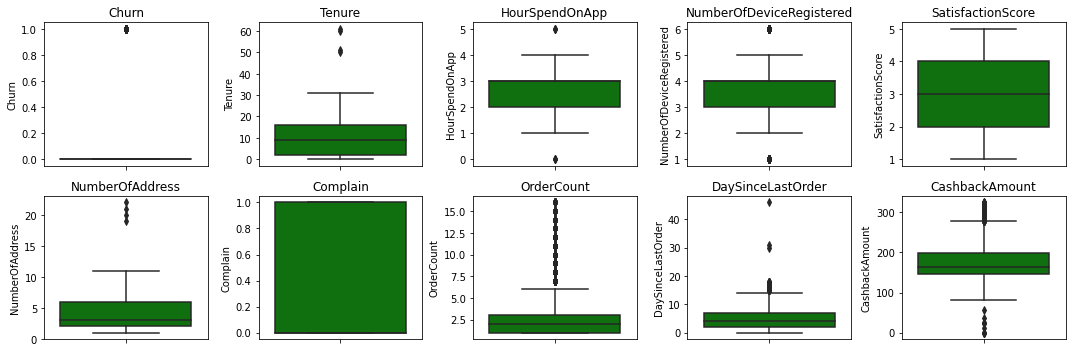

In [35]:
plt.figure(figsize=(15, 5))
data_numerik = [
        'Churn', 'Tenure', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 
        'SatisfactionScore', 'NumberOfAddress', 'Complain',
        'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'
    ]

for i in range(len(data_numerik)) :
    plt.subplot(2, 5, i + 1)
    sns.boxplot(y=dataChurn[data_numerik[i]], data=dataChurn, color='green')
    plt.title(data_numerik[i])

plt.tight_layout()
plt.show()

In [36]:
data_outlier = ['Tenure', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
for i in data_outlier :
    Q1 = dataChurn[i].quantile(0.25)
    Q3 = dataChurn[i].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (1.5 * IQR)
    high_limit = Q3 + (1.5 * IQR)
    dataChurn = dataChurn[(dataChurn[i] >= low_limit) & (dataChurn[i] <= high_limit)]

dataChurn.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,1.0,5.0,159.93
1,1,1.0,Phone,1,E wallet,Male,3.0,4,Mobile Phone,3,Single,7,1,1.0,0.0,120.90
2,1,1.0,Phone,1,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,1.0,3.0,120.28
3,1,0.0,Phone,3,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,1.0,3.0,134.07
4,1,0.0,Phone,1,Credit Card,Male,2.0,3,Mobile Phone,5,Single,3,0,1.0,3.0,129.60


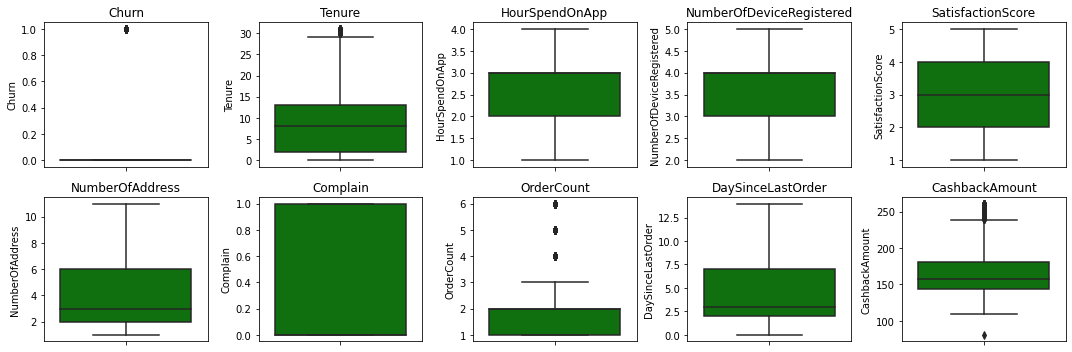

In [37]:
plt.figure(figsize=(15, 5))
data_numerik = [
        'Churn', 'Tenure', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 
        'SatisfactionScore', 'NumberOfAddress', 'Complain',
        'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'
    ]

for i in range(len(data_numerik)) :
    plt.subplot(2, 5, i + 1)
    sns.boxplot(y=dataChurn[data_numerik[i]], data=dataChurn, color='green')
    plt.title(data_numerik[i])

plt.tight_layout()
plt.show()

## Distribusi & Transformasi Fitur

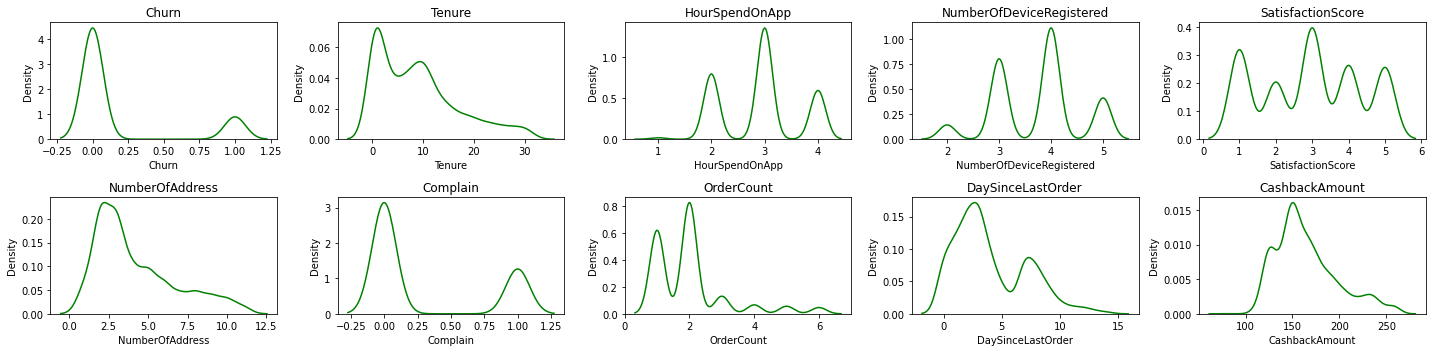

In [38]:
plt.figure(figsize=(20, 5))
for i in range(len(data_numerik)) :
    plt.subplot(2, 5, i + 1)
    sns.kdeplot(x=dataChurn[data_numerik[i]], data=dataChurn, color='green')
    plt.title(data_numerik[i])

plt.tight_layout()
plt.show()

In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

data_standard = ['CashbackAmount']
data_log = ['Tenure', 'NumberOfAddress', 'DaySinceLastOrder']

for i in data_standard :
    dataChurn[i] = StandardScaler().fit_transform(dataChurn[i].values.reshape(len(dataChurn), 1))

for j in data_log :
    dataChurn[j] = np.cbrt(dataChurn[j])

data_numerik_normalize = ['Tenure', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount']
for x in data_numerik_normalize :
    dataChurn[x] = MinMaxScaler().fit_transform(dataChurn[x].values.reshape(len(dataChurn), 1))

dataChurn.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,0.505320,Mobile Phone,3,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,0.882436,1,1.0,0.709492,0.438427
1,1,0.318331,Phone,1,E wallet,Male,3.0,4,Mobile Phone,3,Single,0.745871,1,1.0,0.000000,0.221630
2,1,0.318331,Phone,1,Debit Card,Male,2.0,4,Mobile Phone,3,Single,0.667593,1,1.0,0.598408,0.218186
3,1,0.000000,Phone,3,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,0.817007,0,1.0,0.598408,0.294784
4,1,0.000000,Phone,1,Credit Card,Male,2.0,3,Mobile Phone,5,Single,0.361321,0,1.0,0.598408,0.269955


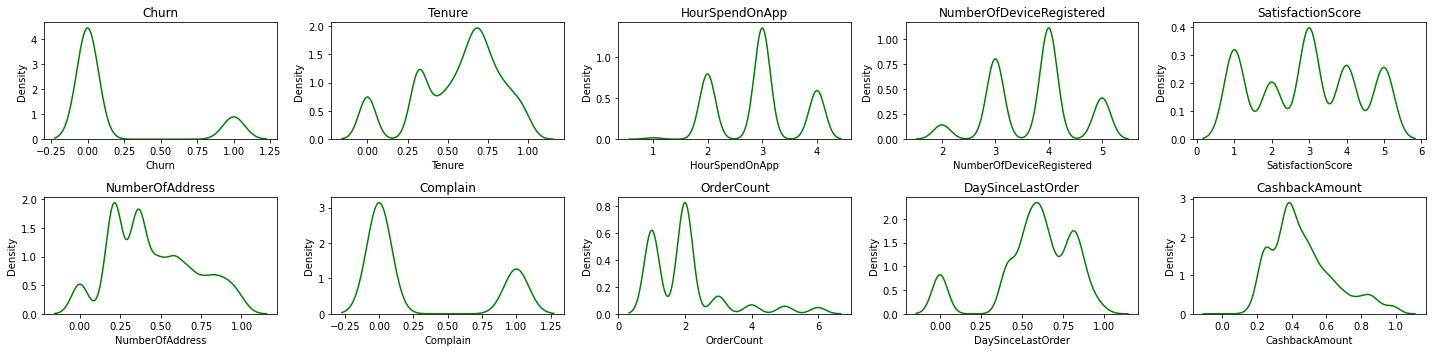

In [40]:
plt.figure(figsize=(20, 5))
for i in range(len(data_numerik)) :
    plt.subplot(2, 5, i + 1)
    sns.kdeplot(x=dataChurn[data_numerik[i]], data=dataChurn, color='green')
    plt.title(data_numerik[i])

plt.tight_layout()
plt.show()

## Encode Data

In [41]:
dataChurn.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,0.505320,Mobile Phone,3,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,0.882436,1,1.0,0.709492,0.438427
1,1,0.318331,Phone,1,E wallet,Male,3.0,4,Mobile Phone,3,Single,0.745871,1,1.0,0.000000,0.221630
2,1,0.318331,Phone,1,Debit Card,Male,2.0,4,Mobile Phone,3,Single,0.667593,1,1.0,0.598408,0.218186
3,1,0.000000,Phone,3,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,0.817007,0,1.0,0.598408,0.294784
4,1,0.000000,Phone,1,Credit Card,Male,2.0,3,Mobile Phone,5,Single,0.361321,0,1.0,0.598408,0.269955


In [42]:
from sklearn.preprocessing import LabelEncoder

data_kategorik_label = ['Gender']
data_kategorik_ohe = ['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus']

for i in data_kategorik_label :
    dataChurn[i] = LabelEncoder().fit_transform(dataChurn[i])

dataChurn = pd.get_dummies(data=dataChurn, columns=data_kategorik_ohe)

dataChurn.head()

,Churn,Tenure,CityTier,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderCount,...,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,0.505320,3,0,3.0,3,2,0.882436,1,1.0,...,0,1,0,0,0,1,0,0,0,1
1,1,0.318331,1,1,3.0,4,3,0.745871,1,1.0,...,0,0,1,0,0,0,1,0,0,1
2,1,0.318331,1,1,2.0,4,3,0.667593,1,1.0,...,0,1,0,0,0,0,1,0,0,1
3,1,0.000000,3,1,2.0,4,5,0.817007,0,1.0,...,0,1,0,0,0,1,0,0,0,1
4,1,0.000000,1,1,2.0,3,5,0.361321,0,1.0,...,1,0,0,0,0,0,1,0,0,1


## Balancing Data

In [43]:
dataChurn.shape

(3116, 26)

In [44]:
dataChurn['Churn'].value_counts()

0    2595
1     521
Name: Churn, dtype: int64

In [45]:
from imblearn import over_sampling

X = dataChurn[[i for i in dataChurn if i not in ['Churn']]].values
y = dataChurn['Churn'].values

X_over, y_over = over_sampling.RandomOverSampler(0.8).fit_resample(X, y)

C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [46]:
dataChurn = pd.DataFrame(X_over, columns=dataChurn.columns[1:])
dataChurn['Churn'] = y_over
dataChurn.head()

,Tenure,CityTier,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderCount,DaySinceLastOrder,...,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Churn
0,0.505320,3.0,0.0,3.0,3.0,2.0,0.882436,1.0,1.0,0.709492,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
1,0.318331,1.0,1.0,3.0,4.0,3.0,0.745871,1.0,1.0,0.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,0.318331,1.0,1.0,2.0,4.0,3.0,0.667593,1.0,1.0,0.598408,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
3,0.000000,3.0,1.0,2.0,4.0,5.0,0.817007,0.0,1.0,0.598408,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
4,0.000000,1.0,1.0,2.0,3.0,5.0,0.361321,0.0,1.0,0.598408,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1


In [47]:
dataChurn.shape

(4671, 26)

In [49]:
dataChurn['Churn'].value_counts()

0    2595
1    2076
Name: Churn, dtype: int64

In [48]:
dataChurn.to_csv('./Dataset/Data_Churn.csv', index=False)